# Data Preprocessing

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat
from scipy import stats
from scipy.stats import levene
import math

%matplotlib inline

In [86]:
np.random.seed(17246221)

In [87]:
data = pd.read_excel('ManhattenCosts.xlsx')

In [88]:
data.describe()

,Unnamed: 0,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
count,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000
mean,1769.000000,5332.589997,5138.940379,1.351936,1.366770,939.727324,4.970896,11.908307,51.994914,0.403504,0.154846,0.160215,0.281153,0.294716,0.185646,0.055100,0.174908
std,1021.765629,3311.552136,3162.824760,0.967595,0.599588,477.949074,5.513589,10.960893,39.380433,0.490669,0.361809,0.366857,0.449625,0.455979,0.388875,0.228208,0.379942
min,0.000000,1.000000,1300.000000,0.000000,0.000000,250.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,884.500000,2443.500000,3150.000000,1.000000,1.000000,613.000000,2.000000,4.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1769.000000,5128.000000,4000.000000,1.000000,1.000000,800.000000,4.000000,8.000000,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2653.500000,8149.500000,6000.000000,2.000000,2.000000,1141.000000,6.000000,17.000000,90.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,3538.000000,11349.000000,20000.000000,5.000000,5.000000,4800.000000,43.000000,83.000000,180.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [89]:
data

,Unnamed: 0,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,3534,7582,4210,1.0,1,532,3,8.0,16,1,1,1,1,1,1,0,1,Chelsea,Manhattan
3535,3535,5686,6675,2.0,2,988,5,10.0,9,1,1,1,1,1,1,0,1,Tribeca,Manhattan
3536,3536,9679,1699,0.0,1,250,2,5.0,96,0,0,0,0,0,0,0,0,Little Italy,Manhattan
3537,3537,5188,3475,1.0,1,651,6,5.0,14,1,0,1,1,1,1,0,1,Midtown West,Manhattan


In [90]:
# bedroom, bathroom
for col in data.iloc[:,3:5]:
  print(data[col].unique())
# mintosubway - neighborhood
for col in data.iloc[:,6:]:
  print(data[col].unique())

[0.  2.  1.  3.  0.5 2.5 4.  5.  3.5 1.5]
[1 2 0 3 4 5]
[ 9  4  2  3  6  0  5 43  7  1 11 10  8 13 12 14 16 17 15]
[ 2.   1.  51.   8.   4.   5.  21.  30.  17.   9.  14.  40.   3.  15.
 12.  22.  26.   6.   7.  19.  46.  24.  36.  10.  25.  11.  27.  28.
 16.  29.  38.  18.  43.  34.  23.  32.  20.  33.  37.  55.  35.  45.
 54.  31.  13.  53.  39.  42.  50.  41.  56.  83.  66.  64.  47.  81.
 48.  44.  52.  62.  49.   0.  57.   6.5]
[ 17  96  29  31 136 101 115  33   2 106  14  39  52  11  85 111  10  56
  15  44   5   6 116  27   9  75  87  57   7  13  91 105  86  89  30 112
  88  25  47  28  42   8  43 102  16 113  90  37  60  32 151 126  41   1
  38  92  76  19  62  71  55  53 100  93  58  99  51  54  66 108 132   3
  65  34  46  18   4  98  12  84  26 109  79  50 110  22  95  61   0 180
  80 104  59 103  64 107  24  36  48 118  69  35 156 124 114  45  20 122
 120  81  78 121  77  94  49  21  67 117  74 146  40  82]
[1 0]
[1 0]
[0 1]
[0 1]
[1 0]
[1 0]
[0 1]
[1 0]
['Upper East Side' 

In [91]:
df = data.iloc[:,:-1]

In [92]:
df.describe()

,Unnamed: 0,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
count,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000
mean,1769.000000,5332.589997,5138.940379,1.351936,1.366770,939.727324,4.970896,11.908307,51.994914,0.403504,0.154846,0.160215,0.281153,0.294716,0.185646,0.055100,0.174908
std,1021.765629,3311.552136,3162.824760,0.967595,0.599588,477.949074,5.513589,10.960893,39.380433,0.490669,0.361809,0.366857,0.449625,0.455979,0.388875,0.228208,0.379942
min,0.000000,1.000000,1300.000000,0.000000,0.000000,250.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,884.500000,2443.500000,3150.000000,1.000000,1.000000,613.000000,2.000000,4.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1769.000000,5128.000000,4000.000000,1.000000,1.000000,800.000000,4.000000,8.000000,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2653.500000,8149.500000,6000.000000,2.000000,2.000000,1141.000000,6.000000,17.000000,90.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,3538.000000,11349.000000,20000.000000,5.000000,5.000000,4800.000000,43.000000,83.000000,180.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [93]:
df

,Unnamed: 0,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood
0,0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side
1,1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village
2,2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown
3,3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village
4,4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,3534,7582,4210,1.0,1,532,3,8.0,16,1,1,1,1,1,1,0,1,Chelsea
3535,3535,5686,6675,2.0,2,988,5,10.0,9,1,1,1,1,1,1,0,1,Tribeca
3536,3536,9679,1699,0.0,1,250,2,5.0,96,0,0,0,0,0,0,0,0,Little Italy
3537,3537,5188,3475,1.0,1,651,6,5.0,14,1,0,1,1,1,1,0,1,Midtown West


In [94]:
df.isnull().sum()

Unnamed: 0          0
rental_id           0
rent                0
bedrooms            0
bathrooms           0
size_sqft           0
min_to_subway       0
floor               0
building_age_yrs    0
no_fee              0
has_roofdeck        0
has_washer_dryer    0
has_doorman         0
has_elevator        0
has_dishwasher      0
has_patio           0
has_gym             0
neighborhood        0
dtype: int64

Show all the neighborhoods in Manhattan.

In [95]:
list_neighborhood = list(set(data['neighborhood']))
dict_neighborhood = {}
for i in range(len(list_neighborhood)):
    dict_neighborhood[list_neighborhood[i]] = i
dict_neighborhood

{'East Village': 0,
 'Midtown West': 1,
 'Upper East Side': 2,
 'Washington Heights': 3,
 'Stuyvesant Town/PCV': 4,
 'Chinatown': 5,
 'Gramercy Park': 6,
 'Midtown': 7,
 'West Village': 8,
 'Chelsea': 9,
 'Roosevelt Island': 10,
 'Morningside Heights': 11,
 'Greenwich Village': 12,
 'Midtown East': 13,
 'Central Harlem': 14,
 'Soho': 15,
 'Lower East Side': 16,
 'East Harlem': 17,
 'Midtown South': 18,
 'Little Italy': 19,
 'Manhattanville': 20,
 'Inwood': 21,
 'Hamilton Heights': 22,
 'Nolita': 23,
 'Central Park South': 24,
 'Flatiron': 25,
 'West Harlem': 26,
 'Upper West Side': 27,
 'Financial District': 28,
 'Battery Park City': 29,
 'Long Island City': 30,
 'Tribeca': 31}

Divide the neighborhoods into mid, upper, lower and surround.

In [96]:
mid = ['Gramercy Park', 'Midtown East', 'Flatiron', 'East Village', 'Midtown South', 'Midtown West', 'Central Park South', 'Midtown',
       'West Village', 'Chelsea', 'Greenwich Village', 'Stuyvesant Town/PCV', 'Little Italy']
lower = ['Tribeca', 'Chinatown', 'Lower East Side', 'Soho', 'Battery Park City', 'Financial District', 'Nolita']
upper = ['Hamilton Heights', 'Central Harlem', 'Washington Heights', 'Inwood', 'Upper West Side', 
         'East Harlem', 'Upper East Side', 'Manhattanville', 'Morningside Heights', 'West Harlem']
surround = ['Long Island City', 'Roosevelt Island']

In [97]:
def name2idx(x):
    if x in surround:
        return 0
    elif x in upper:
        return 1
    elif x in mid:
        return 2
    elif x in lower:
        return 3

Change the neighborhood names in table to index

In [98]:
df['neighborhood_index'] = df['neighborhood']

In [99]:
df['neighborhood_index'] = df['neighborhood_index'].apply(name2idx)

In [100]:
df

,Unnamed: 0,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,neighborhood_index
0,0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,1
1,1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,2
2,2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,2
3,3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,2
4,4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,3534,7582,4210,1.0,1,532,3,8.0,16,1,1,1,1,1,1,0,1,Chelsea,2
3535,3535,5686,6675,2.0,2,988,5,10.0,9,1,1,1,1,1,1,0,1,Tribeca,3
3536,3536,9679,1699,0.0,1,250,2,5.0,96,0,0,0,0,0,0,0,0,Little Italy,2
3537,3537,5188,3475,1.0,1,651,6,5.0,14,1,0,1,1,1,1,0,1,Midtown West,2


In [101]:
df.describe()

,Unnamed: 0,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood_index
count,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000
mean,1769.000000,5332.589997,5138.940379,1.351936,1.366770,939.727324,4.970896,11.908307,51.994914,0.403504,0.154846,0.160215,0.281153,0.294716,0.185646,0.055100,0.174908,1.799096
std,1021.765629,3311.552136,3162.824760,0.967595,0.599588,477.949074,5.513589,10.960893,39.380433,0.490669,0.361809,0.366857,0.449625,0.455979,0.388875,0.228208,0.379942,0.713307
min,0.000000,1.000000,1300.000000,0.000000,0.000000,250.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,884.500000,2443.500000,3150.000000,1.000000,1.000000,613.000000,2.000000,4.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1769.000000,5128.000000,4000.000000,1.000000,1.000000,800.000000,4.000000,8.000000,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,2653.500000,8149.500000,6000.000000,2.000000,2.000000,1141.000000,6.000000,17.000000,90.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000
max,3538.000000,11349.000000,20000.000000,5.000000,5.000000,4800.000000,43.000000,83.000000,180.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


### Dimensionality Reduction(PCA)

It is a popular method for reducing the number of features in a dataset while preserving as much information as possible.

In [102]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

min-max scaling

In [103]:
df_pca = df[['rent', 'bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 
          'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym', 'neighborhood_index']].values
df_pca

array([[2.550e+03, 0.000e+00, 1.000e+00, ..., 0.000e+00, 1.000e+00,
        1.000e+00],
       [1.150e+04, 2.000e+00, 2.000e+00, ..., 0.000e+00, 0.000e+00,
        2.000e+00],
       [4.500e+03, 1.000e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        2.000e+00],
       ...,
       [1.699e+03, 0.000e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        2.000e+00],
       [3.475e+03, 1.000e+00, 1.000e+00, ..., 0.000e+00, 1.000e+00,
        2.000e+00],
       [4.500e+03, 1.000e+00, 1.000e+00, ..., 1.000e+00, 1.000e+00,
        3.000e+00]])

In [104]:
scaler = MinMaxScaler()
scaler.fit(df_pca)
Y_scaled = scaler.transform(df_pca)

One common approach for choosing the number of dimensions in PCA is to look at the explained variance ratio of the principal components. The explained variance ratio is the proportion of the total variance in the data that is explained by each principal component. By plotting the explained variance ratio as a function of the number of dimensions, you can see how much of the total variance is explained by the first few dimensions.

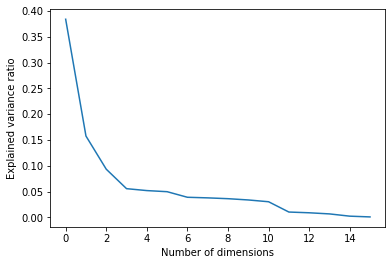

[0.38392886 0.15769052 0.09343272 0.05572793 0.05201841 0.04986599
 0.03906357 0.03790616 0.03631976 0.03385625 0.03039714 0.01045167
 0.00902361 0.00684318 0.00246619 0.00100805]


0.6350521037098595

In [105]:
# Fit a PCA model to the data
pca = PCA()
pca.fit(Y_scaled)

# Plot the explained variance ratio
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of dimensions')
plt.ylabel('Explained variance ratio')
plt.show()
print(pca.explained_variance_ratio_)
np.sum(pca.explained_variance_ratio_[:-13])

So we set dimension to 16-13=3.

In [106]:
pca = PCA(n_components=3)
pca.fit(Y_scaled)
Y_transformed = pca.transform(Y_scaled)

In [107]:
#data1.to_csv('/content/gdrive/My Drive/01project/rent_preprocessed.csv')

Text(0, 0.5, '# of rent')

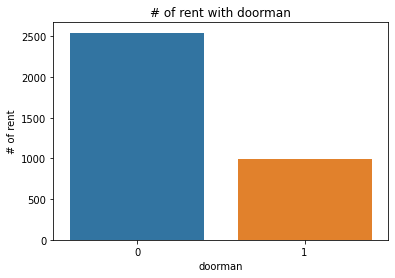

In [108]:
s1 = sns.barplot(list(df['has_doorman'].unique()),list(df['has_doorman'].value_counts()))
plt.title("# of rent with doorman")
s1.set_xlabel("doorman")
s1.set_ylabel("# of rent")

Text(0, 0.5, '# of rent')

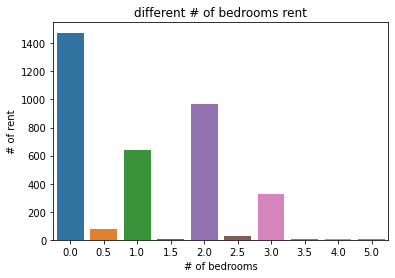

In [109]:
s2 = sns.barplot(list(df['bedrooms'].unique()),list(df['bedrooms'].value_counts()))
plt.title("different # of bedrooms rent")
s2.set_xlabel("# of bedrooms")
s2.set_ylabel("# of rent")

Text(0.5, 1.0, '# of rent by different bathrooms separated by gym')

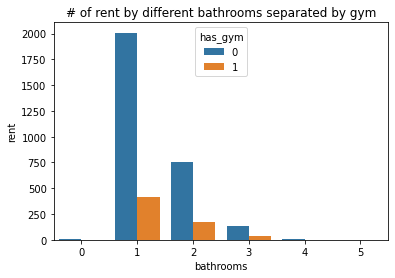

In [110]:
df1 = df.groupby(['bathrooms','has_gym']).count()
df1.reset_index(inplace=True)
ax1 = sns.barplot(x='bathrooms', y='rent', hue='has_gym', data=df1)
ax1.set_title("# of rent by different bathrooms separated by gym")

Text(0.5, 1.0, '# of rent by different time to subway separated by elevator')

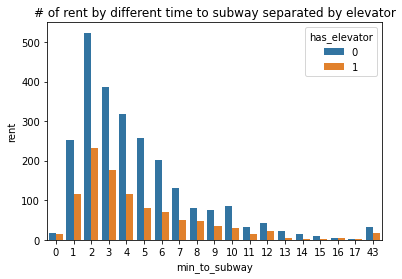

In [111]:
df2 = df.groupby(['min_to_subway','has_elevator']).count()
df2.reset_index(inplace=True)
ax2 = sns.barplot(x='min_to_subway', y='rent', hue='has_elevator', data=df2)
ax2.set_title("# of rent by different time to subway separated by elevator")

# Hypothesis testing

In [112]:
# first filter out 1b1b situations, 1415 rows x 19 columns
mask = (df['bedrooms'] == 1) & (df['bathrooms'] == 1)
oneb1b = df.loc[mask]

#### 1 Intuitively, as floor is higher, the rent will be higher because of nicer view.

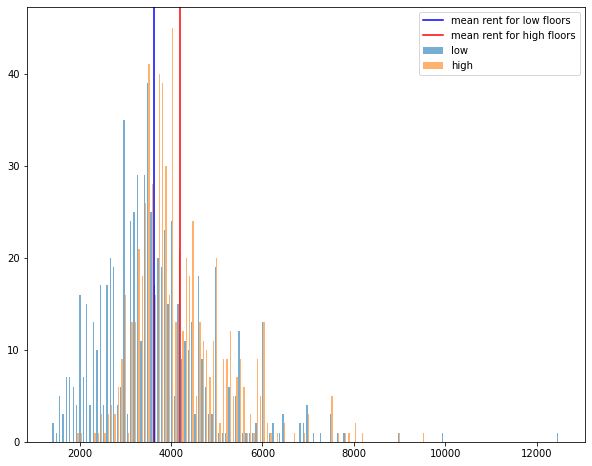

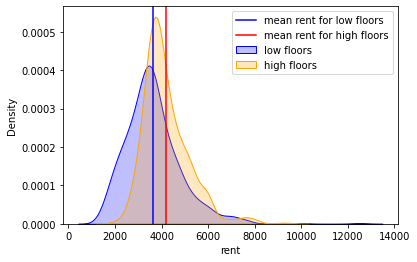

In [113]:
# split data into two sets by the median of floor --> 8, because split by median gives about 50/50 ratio of low and high floors
flrMedian = stat.median(oneb1b['floor'])
low = oneb1b[oneb1b['floor'] <= flrMedian]
high = oneb1b[oneb1b['floor'] > flrMedian]

plt.figure(figsize=(10,8))
plt.hist([low['rent'], high['rent']], bins = 150, label=['low', 'high'], alpha = 0.6)
plt.axvline(x = stat.mean(low['rent']), color = 'b', label = 'mean rent for low floors')
plt.axvline(x = stat.mean(high['rent']), color = 'r', label = 'mean rent for high floors')
plt.legend()
plt.show()

fig = sns.kdeplot(low['rent'], shade=True, color='b', label = 'low floors')
fig = sns.kdeplot(high['rent'], shade=True, color='orange', label = 'high floors')
fig = plt.axvline(x = stat.mean(low['rent']), color = 'b', label = 'mean rent for low floors')
fig = plt.axvline(x = stat.mean(high['rent']), color = 'r', label = 'mean rent for high floors')
plt.legend()
plt.show()

In [114]:
# rent prices of low floors are not normally distributed
stats.kstest(low['rent'], stats.norm.cdf)

KstestResult(statistic=1.0, pvalue=0.0)

In [115]:
# rent prices of low floors are not normally distributed
stats.kstest(high['rent'], stats.norm.cdf)

KstestResult(statistic=1.0, pvalue=0.0)

In [116]:
stat, p = levene(low['rent'], high['rent'])
p

0.00023297495486440222

In [117]:
# calculate inter-individual variability
# sem for low floor is 45.477, sem for high floor is 37.709
sem1ow = low['rent'].std() / math.sqrt(len(low['rent']))
semhigh = high['rent'].std() / math.sqrt(len(high['rent']))

In [118]:
stats.ttest_ind(low['rent'], high['rent'], equal_var = False, alternative = 'less')

Ttest_indResult(statistic=-9.320113279480157, pvalue=2.2376991702762754e-20)

# Regression

In [119]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [120]:
x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 
          'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym', 'neighborhood_index']].values
y = df['rent']

In [121]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [122]:
lr = LinearRegression().fit(x_train, y_train)
y_hat = lr.predict(x_test)
r2 = r2_score(y_test,y_hat)
print(r2)

0.7989831149886144


In [123]:
lr.coef_

array([-255.94309076, 1234.69062944,    4.73516489,  -17.36334981,
         21.33107007,   -7.55694897,  -93.65488266,   76.1732383 ,
        204.21475515, -221.52478476,  143.73748992,  -52.76500296,
       -138.82422201,   -2.63396412,  226.61124976])

In [124]:
regr_cv = RidgeCV(alphas=[0.0001,0.0005, 0.001, 0.005, 0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0, 110.0, 120.0, 130.0, 140.0, 150.0, 200.0])
model_cv = regr_cv.fit(x_train, y_train)
best_alpha = model_cv.alpha_
best_alpha

20.0

In [125]:
ridge = Ridge(best_alpha).fit(x_train,y_train)
pred = ridge.predict(x_test)
rmse_ridge = np.sqrt(mean_squared_error(y_test, pred))
r2_ridge = r2_score(y_test,pred)
print(rmse_ridge)
print(r2_ridge)

1423.5000262973579
0.799505713162535


In [126]:
ridge.coef_

array([-240.1145134 , 1159.53136622,    4.78617716,  -17.25609671,
         21.37177076,   -7.66681235,  -87.15861548,   68.69347127,
        189.08223876, -198.00687038,  123.87262558,  -42.58279515,
       -116.4714613 ,    1.25362875,  223.58559489])

In [127]:
lasso_cv = LassoCV(alphas=[0.0001,0.0005, 0.001, 0.005, 0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0, 110.0, 120.0, 130.0, 140.0, 150.0, 200.0])
model_cv = lasso_cv.fit(x_train, y_train)
best_alpha_lasso = model_cv.alpha_    
best_alpha_lasso

1.0

In [128]:
lasso = Lasso(best_alpha_lasso).fit(x_train,y_train)
pred_lasso = lasso.predict(x_test)
rmse_lasso = np.sqrt(mean_squared_error(y_test, pred_lasso))
r2_lasso = r2_score(y_test,pred_lasso)
print(rmse_lasso)
print(r2_lasso)

1424.368256916951
0.7992610649542514


In [129]:
lasso.coef_

array([-251.47263817, 1222.69478915,    4.74110258,  -17.33530333,
         21.31703767,   -7.56443324,  -88.00031648,   64.00700544,
        191.55098837, -201.5236315 ,  126.39572755,  -37.83426239,
       -116.8092299 ,    0.        ,  225.03556378])

In [130]:
lr_beta = lr.coef_.tolist()
ridge_beta = ridge.coef_.tolist()
lasso_beta = lasso.coef_.tolist()
df_temp = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 
          'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym', 'neighborhood_index']]
beta_df = pd.DataFrame([lr_beta, ridge_beta,lasso_beta], columns = df_temp.columns)
beta_df.index = ['Linear', 'Ridge', 'Lasso']  
beta_df

,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood_index
Linear,-255.943091,1234.690629,4.735165,-17.363350,21.331070,-7.556949,-93.654883,76.173238,204.214755,-221.524785,143.737490,-52.765003,-138.824222,-2.633964,226.611250
Ridge,-240.114513,1159.531366,4.786177,-17.256097,21.371771,-7.666812,-87.158615,68.693471,189.082239,-198.006870,123.872626,-42.582795,-116.471461,1.253629,223.585595
Lasso,-251.472638,1222.694789,4.741103,-17.335303,21.317038,-7.564433,-88.000316,64.007005,191.550988,-201.523631,126.395728,-37.834262,-116.809230,0.000000,225.035564


Text(0, 0.5, 'Predictions')

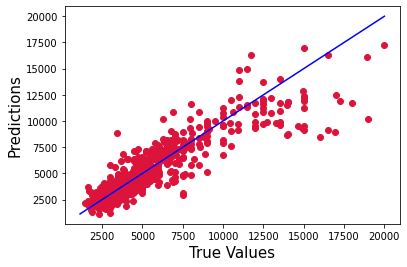

In [131]:
plt.scatter(y_test, pred_lasso, c='crimson')
p1 = max(max(pred_lasso), max(y_test))
p2 = min(min(pred_lasso), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)

# Classification

## Unsupervised

### Clustering(k-means/DBSCAN)

In [132]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

#### k-means

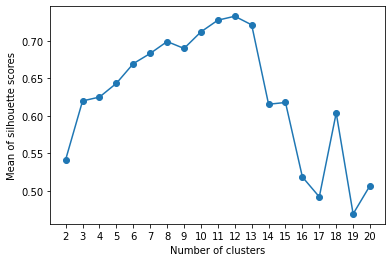

In [133]:
scores = []
for i in range(2, 21):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=1001
    ).fit(Y_transformed)
    labels = km.labels_
    scores.append(silhouette_score(Y_transformed,labels,metric='euclidean'))

plt.plot(range(2,21), scores, marker='o')
plt.xticks(np.arange(2, 21, step=1))
plt.xlabel('Number of clusters')
plt.ylabel('Mean of silhouette scores')
plt.show()

optimal number of clusters: 12

In [134]:
km = KMeans(
    n_clusters=12, init='random',
    n_init=10, max_iter=300,
    tol=1e-04, random_state=1001
).fit(Y_transformed)
labels = km.labels_
silhouette_score(Y_transformed,labels,metric='euclidean')

0.7330003943912299

#### DBSCAN

In [135]:
params = {'eps':[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],\
          'min_samples':[5,6,7,8,9,10,15,20,30,40,50]}
max_score, best_components = 0.0, 0
best_params = {'eps':0.0,'min_samples':1}
for eps in params['eps']:
  for min_samples in params['min_samples']:
    DBSCAN_cluster = DBSCAN(eps=eps, min_samples=min_samples).fit(Y_transformed)
    labels = DBSCAN_cluster.labels_
    components = len(np.unique(labels))
    if components>1:
      score = silhouette_score(Y_transformed,labels,metric='euclidean')
      if score > max_score:
        max_score, best_components = score, components
        best_params['eps'], best_params['min_samples'] = eps, min_samples
max_score, best_params, best_components

(0.7808216762167163, {'eps': 0.1, 'min_samples': 5}, 48)

## Supervised

Import the libraries we need

In [136]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

We take the median of all the rent values and divide the values into two categories. The values above the median are viewed as 'Expensive Rents'. The values below the median are viewed as 'Normal Rents'. 

In [137]:
median = df['rent'].median()
median

4000.0

We set the 'Expensive Rents' as the label of 1 and 'Normal Rents' as the label of 0.

In [138]:
y = df['rent'].apply(lambda x: 1 if x >= median else 0).values
y

array([0, 1, 1, ..., 0, 0, 1])

We are using 'bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym' and 'neighborhood_index' as the information of the renters. We will use them to do multi-variable logistic regression.

In [139]:
x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 
          'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym', 'neighborhood_index']].values
x

array([[0.00e+00, 1.00e+00, 4.80e+02, ..., 0.00e+00, 1.00e+00, 1.00e+00],
       [2.00e+00, 2.00e+00, 2.00e+03, ..., 0.00e+00, 0.00e+00, 2.00e+00],
       [1.00e+00, 1.00e+00, 9.16e+02, ..., 0.00e+00, 0.00e+00, 2.00e+00],
       ...,
       [0.00e+00, 1.00e+00, 2.50e+02, ..., 0.00e+00, 0.00e+00, 2.00e+00],
       [1.00e+00, 1.00e+00, 6.51e+02, ..., 0.00e+00, 1.00e+00, 2.00e+00],
       [1.00e+00, 1.00e+00, 8.16e+02, ..., 1.00e+00, 1.00e+00, 3.00e+00]])

We will split the dataset to training set and test set at the ratio of 8:2.

In [140]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 8/10, test_size = 2/10)

Here are some options for the penalty function.

In [141]:
params = {'penalty': ['l1', 'l2', 'elasticnet', 'none']}

Doing the logistic regression.

In [142]:
logistic_regression = GridSearchCV(LogisticRegression(), params)
model = logistic_regression.fit(x_train, y_train)

Use the trained logistic regression model to classify the labels for the test dataset and show the results.

In [143]:
pred = model.predict(x_test)
pred

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,

Show the original labels of the test dataset.

In [144]:
y_test

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,

Show the accuracy of classifying the labels for the test dataset.

In [145]:
accuracy = logistic_regression.best_score_
accuracy

0.8301038881722038

Show the AUC values.

In [146]:
AUC = roc_auc_score(y_test, pred)
AUC

0.8252166620072687

Plot the AUC curve.

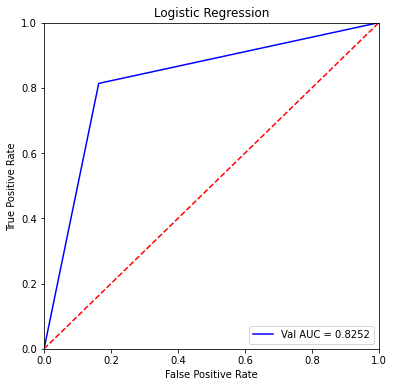

In [147]:
fpr, tpr, threshold = roc_curve(y_test, pred)
plt.figure(figsize=(6,6))
plt.title('Logistic Regression')
plt.plot(fpr, tpr, 'b', label = 'Val AUC = %0.4f' % AUC)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Show the coefficients of the logistic regression.

In [148]:
best_model = model.best_estimator_
best_model.coef_.ravel()

array([ 1.28563512, -0.41367112,  0.00370463, -0.07691402,  0.02022666,
       -0.02455402, -0.8735721 , -0.07146264,  0.3187076 , -0.11096693,
       -0.0106945 ,  0.03466852, -0.15667949,  0.03689629,  0.32209889])

Decision Tree

In [149]:
param_test1 = {'max_features':range(3,9,1),'random_state':range(0,10,1),'min_samples_leaf':range(1,10,1)}
decision_tree = GridSearchCV(estimator = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_leaf_nodes=None,
            min_impurity_decrease=0.005,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=1, splitter='random'), 
                       param_grid = param_test1, scoring='roc_auc',cv=5)
model_1 = decision_tree.fit(x_train, y_train)
decision_tree.best_params_, decision_tree.best_score_

({'max_features': 7, 'min_samples_leaf': 1, 'random_state': 2},
 0.8926282364231095)

In [150]:
pred_1 = model_1.predict(x_test)
pred_1

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,

In [151]:
AUC_1 = roc_auc_score(y_test, pred_1)
AUC_1

0.8083909101801189

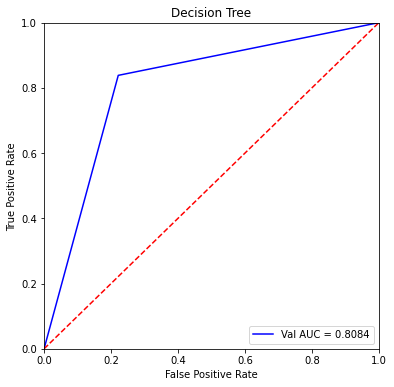

In [152]:
fpr, tpr, threshold = roc_curve(y_test, pred_1)
plt.figure(figsize=(6,6))
plt.title('Decision Tree')
plt.plot(fpr, tpr, 'b', label = 'Val AUC = %0.4f' % AUC_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Random Forest

In [153]:
rfc=RandomForestClassifier(random_state=42)

In [154]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [155]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
model_2 = CV_rfc.fit(x_train, y_train)

In [156]:
CV_rfc.best_params_, CV_rfc.best_score_

({'criterion': 'entropy',
  'max_depth': 8,
  'max_features': 'auto',
  'n_estimators': 200},
 0.878141729142907)

In [157]:
pred_2 = model_2.predict(x_test)
pred_2

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,

In [158]:
AUC_2 = roc_auc_score(y_test, pred_2)
AUC_2

0.8976277007867726

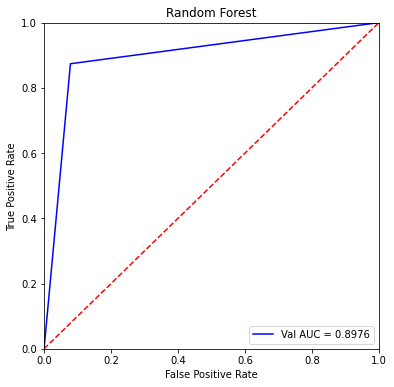

In [159]:
fpr, tpr, threshold = roc_curve(y_test, pred_2)
plt.figure(figsize=(6,6))
plt.title('Random Forest')
plt.plot(fpr, tpr, 'b', label = 'Val AUC = %0.4f' % AUC_2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()